In [2]:
import numpy as np
import matplotlib.pyplot as plt
from noise_correlations import discriminability, null_models, plot

In [3]:
angle = np.pi/4
r = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])
cov0 = r.dot(np.array([[5., 0.], [0., 25.]])).dot(r.T)
cov1 = cov0

In [4]:
deltas = np.logspace(-1.25, .25, 5)
deltas = np.array([np.sqrt(5)/2.])
n_dtheta = 50
measures = [discriminability.linear_discriminability, discriminability.mv_normal_jeffreys,
            discriminability.lda_samples, discriminability.qda_samples]

results = np.zeros((n_dtheta, n_dtheta, deltas.size, len(measures)))

for ii, theta0 in enumerate(np.linspace(-np.pi/2, np.pi/2, n_dtheta)):
    r0 = np.array([[np.cos(theta0), np.sin(theta0)], [-np.sin(theta0), np.cos(theta0)]])
    cov0p = r0.dot(cov0).dot(r0.T)
    for jj, theta1 in enumerate(np.linspace(-np.pi/2, np.pi/2, n_dtheta)):
        r1 = np.array([[np.cos(theta1), np.sin(theta1)], [-np.sin(theta1), np.cos(theta1)]])
        cov1p = r1.dot(cov1).dot(r1.T)
        for kk, delta in enumerate(deltas):
            mu0 = delta * np.array([-1., 1.]) / np.sqrt(2)
            mu1 = -mu0
            mu0 += 10
            mu1 += 10
            for nn, m in enumerate(measures):
                if nn > 1:
                    results[ii, jj, kk, nn] = m(mu0, cov0p, mu1, cov1p, size=100000)
                else:
                    results[ii, jj, kk, nn] = m(mu0, cov0p, mu1, cov1p)
#results -= results.min(axis=(0, 1, 2), keepdims=True)
#results /= results.max(axis=(0, 1, 2), keepdims=True)

In [9]:
resultsp = results.copy()
#resultsp -= resultsp.min(axis=(0, 1, 2), keepdims=True)
resultsp /= resultsp.max(axis=(0, 1, 2), keepdims=True)

TypeError: 'AxesSubplot' object does not support indexing

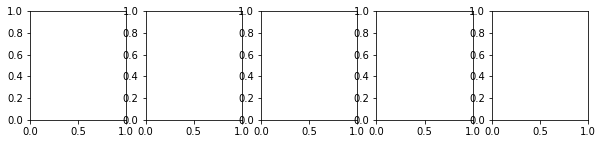

In [4]:
f, axes = plt.subplots(deltas.size, 1+len(measures), figsize = (2*(1+len(measures)), 2*deltas.size))
for ii, delta in enumerate(deltas):
    axr = axes[ii]
    mu0 = delta * np.array([-1., 1]) / np.sqrt(2)
    mu1 = -mu0
    mu0 += 1
    mu1 += 1
    plot.plot_ellipses(mu0, cov0, mu1, cov1, faxes=(f, axr[0]))
    for jj, ax in enumerate(axr[1:]):
        ax.imshow(results[:, :, ii, jj][::-1], extent=[-np.pi/2, np.pi/2, -np.pi/2, np.pi/2])
for ax in axes[:, 0]:
    ax.set_xlabel(r'$R_0$')
    ax.set_ylabel(r'$R_1$')
for ax in axes[:, 1:].ravel():
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
axes[0, 1].set_title('Linear Fisher info')
axes[0, 2].set_title('Jeffrey\'s Div')
axes[0, 3].set_title('LDA accuracy')
axes[0, 4].set_title('QDA accuracy')
f.tight_layout()
plt.savefig('/home/jesse/Downloads/unnorm.pdf', dpi=300)

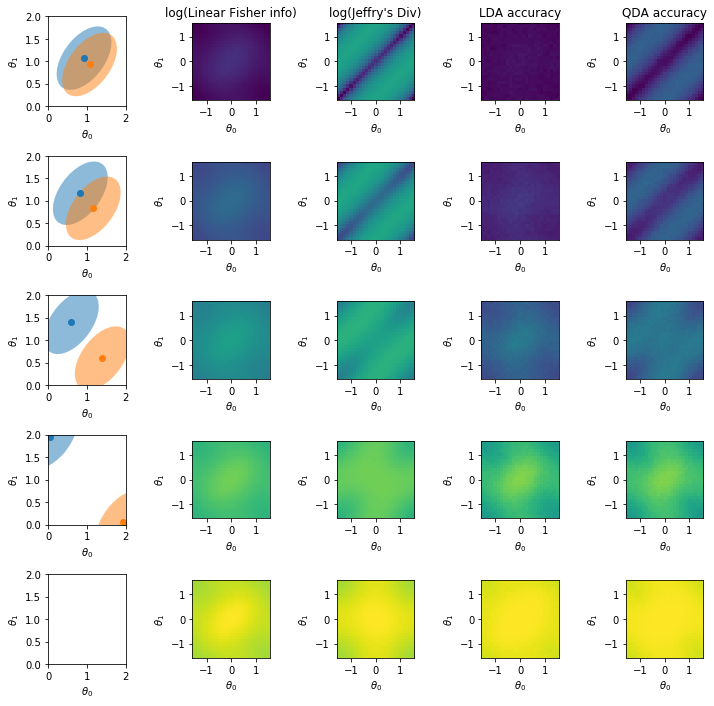

In [6]:
f, axes = plt.subplots(deltas.size, 1+len(measures), figsize = (2*(1+len(measures)), 2*deltas.size))
for ii, delta in enumerate(deltas):
    axr = axes[ii]
    mu0 = delta * np.array([-1., 1]) / np.sqrt(2)
    mu1 = -mu0
    mu0 += 1
    mu1 += 1
    plot.plot_ellipses(mu0, cov0, mu1, cov1, faxes=(f, axr[0]))
    for jj, ax in enumerate(axr[1:]):
        d = resultsp[:, :, ii, jj][::-1]
        if jj < 2:
            d = np.log(d)
            ax.imshow(d, vmin=np.log(resultsp[:, :, :, jj]).min(), vmax=0, extent=[-np.pi/2, np.pi/2, -np.pi/2, np.pi/2])
        else:
            ax.imshow(d, vmin=resultsp[:, :, :, jj].min(), vmax=1, extent=[-np.pi/2, np.pi/2, -np.pi/2, np.pi/2])
for ax in axes[:, 0]:
    ax.set_xlabel('f_0')
    ax.set_ylabel('f_1')
for ax in axes[:, 0:].ravel():
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    
axes[0, 1].set_title('log(Linear Fisher info)')
axes[0, 2].set_title('log(Jeffry\'s Div)')
axes[0, 3].set_title('LDA accuracy')
axes[0, 4].set_title('QDA accuracy')
f.tight_layout()
plt.savefig('/home/jesse/Downloads/norm.pdf', dpi=300)

# Cosyne Abstract

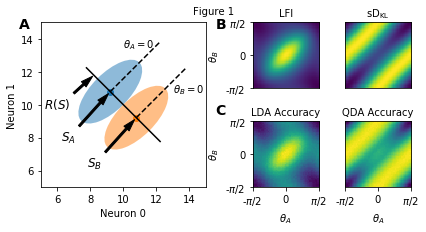

In [9]:
figsize=(6, 3)
f = plt.figure(figsize=figsize)

le = .1
re = .025
te = .075

hg = .09
vg = .15


width = 1. - le - re - 1.25 * hg
width2 = .5 * width
width1 = .25 * width

full_h = width2 * figsize[0] / figsize[1]
half_h = .5 * (full_h - vg)
be = 1 - te - full_h

ax0 = f.add_axes([le, be, width2, full_h])

x0 = le + width2 + hg
x1 = le + width2 + 1.25 * hg + width1
y0 = be + half_h + vg
ax1 = f.add_axes([x0, y0, width1, half_h])
ax2 = f.add_axes([x1, y0, width1, half_h])
ax3 = f.add_axes([x0, be, width1, half_h])
ax4 = f.add_axes([x1, be, width1, half_h])

mu0 = delta * np.array([-1., 1.]) / np.sqrt(2)
mu1 = -mu0
mu0 += 10
mu1 += 10
plot.plot_ellipses(mu0, cov0, mu1, cov1, faxes=(f, ax0))
ax0.set_ylim(5, 15)
ax0.set_xlim(5, 15)
ax0.set_xlabel('Neuron 0')
ax0.set_ylabel('Neuron 1')
ax0.plot([-2 * delta + 10, 2 * delta + 10], [2 * delta + 10, -2 * delta + 10], c='k')
ax0.plot([mu0[0], mu0[0]+3], [mu0[1], mu0[1]+3], c='k', ls='--')
ax0.plot([mu1[0], mu1[0]+3], [mu1[1], mu1[1]+3], c='k', ls='--')

arrow_props = dict(facecolor='black', shrink=0.05, width=2, headwidth=7)
ax0.annotate(r'$S_A$', xy=mu0, xytext=mu0-3, fontsize=12,
            arrowprops=arrow_props)
ax0.annotate(r'$S_B$', xy=mu1, xytext=mu1-3, fontsize=12,
            arrowprops=arrow_props)
ax0.annotate(r'$R(S)$', xy=mu0+np.array([-1, 1]), xytext=mu0+np.array([-4, -1]), fontsize=12,
            arrowprops=arrow_props)
ax0.text(10, 13.5, r'$\theta_A=0$')
ax0.text(13, 10.75, r'$\theta_B=0$')


ax1.imshow(results[:, :, 0, 0][::-1], extent=[-np.pi/2, np.pi/2, -np.pi/2, np.pi/2])
ax2.imshow(results[:, :, 0, 1][::-1], extent=[-np.pi/2, np.pi/2, -np.pi/2, np.pi/2])
ax3.imshow(results[:, :, 0, 2][::-1], extent=[-np.pi/2, np.pi/2, -np.pi/2, np.pi/2])
ax4.imshow(results[:, :, 0, 3][::-1], extent=[-np.pi/2, np.pi/2, -np.pi/2, np.pi/2])

ax1.set_title('LFI', fontsize=10)
ax2.set_title(r'$\mathregular{sD}_\mathregular{KL}$', fontsize=10)
ax3.set_title('LDA Accuracy', fontsize=10)
ax4.set_title('QDA Accuracy', fontsize=10)

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks([])
    ax.set_yticks([])
for ax in [ax3, ax4]:
    ax.set_xlabel(r'$\theta_A$')
    ax.set_xticks([-np.pi/2, 0, np.pi/2])
    ax.set_xticklabels([r'-$\pi$/2', '0', r'$\pi$/2'])
for ax in [ax1, ax3]:
    ax.set_ylabel(r'$\theta_B$')
    ax.set_yticks([-np.pi/2, 0, np.pi/2])
    ax.set_yticklabels([r'-$\pi$/2', '0', r'$\pi$/2'])

y0 = .9
y1 = .5
f.text(le-le/2, y0, 'A', fontsize=14, fontweight='bold')
f.text(le+width2+hg-le/1.5, y0, 'B', fontsize=14, fontweight='bold')
f.text(le+width2+hg-le/1.5, y1, 'C', fontsize=14, fontweight='bold')
f.text(.5, .975, 'Figure 1', va='center', ha='center')


plt.savefig('/home/jesse/Downloads/cosyne1.png', dpi=300)